In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import japanize_matplotlib
import seaborn as sns

In [51]:
df = pd.read_csv('./data/性年齢階級別_総数.tsv', sep='\t',index_col=0)
df = df[0:1]
# 年齢階級の列を削除
df

,総数,科学的介護推進情報,科学的介護推進情報（既往歴情報）,科学的介護推進情報（服薬情報）,個別機能訓練計画情報,生活機能チェック情報,ADL維持等情報,リハビリテーション計画書（医療介護共通部分）,リハビリテーション計画書（介護）,褥瘡マネジメント情報,排せつ支援情報,自立支援促進情報,薬剤変更情報,栄養・摂食嚥下情報,口腔衛生管理情報,口腔機能向上サービス管理情報
年齢階級別,,,,,,,,,,,,,,,,
総数,14885050,2733760,2996290,3172990,950270,923530,738440,547820,546180,520050,368290,233910,149680,682560,183670,137600


                        割合(%)
科学的介護推進情報               18.37
科学的介護推進情報（既往歴情報）        20.13
科学的介護推進情報（服薬情報）         21.32
個別機能訓練計画情報               6.38
生活機能チェック情報               6.20
ADL維持等情報                 4.96
リハビリテーション計画書（医療介護共通部分）   3.68
リハビリテーション計画書（介護）         3.67
褥瘡マネジメント情報               3.49
排せつ支援情報                  2.47
自立支援促進情報                 1.57
薬剤変更情報                   1.01
栄養・摂食嚥下情報                4.59
口腔衛生管理情報                 1.23
口腔機能向上サービス管理情報           0.92


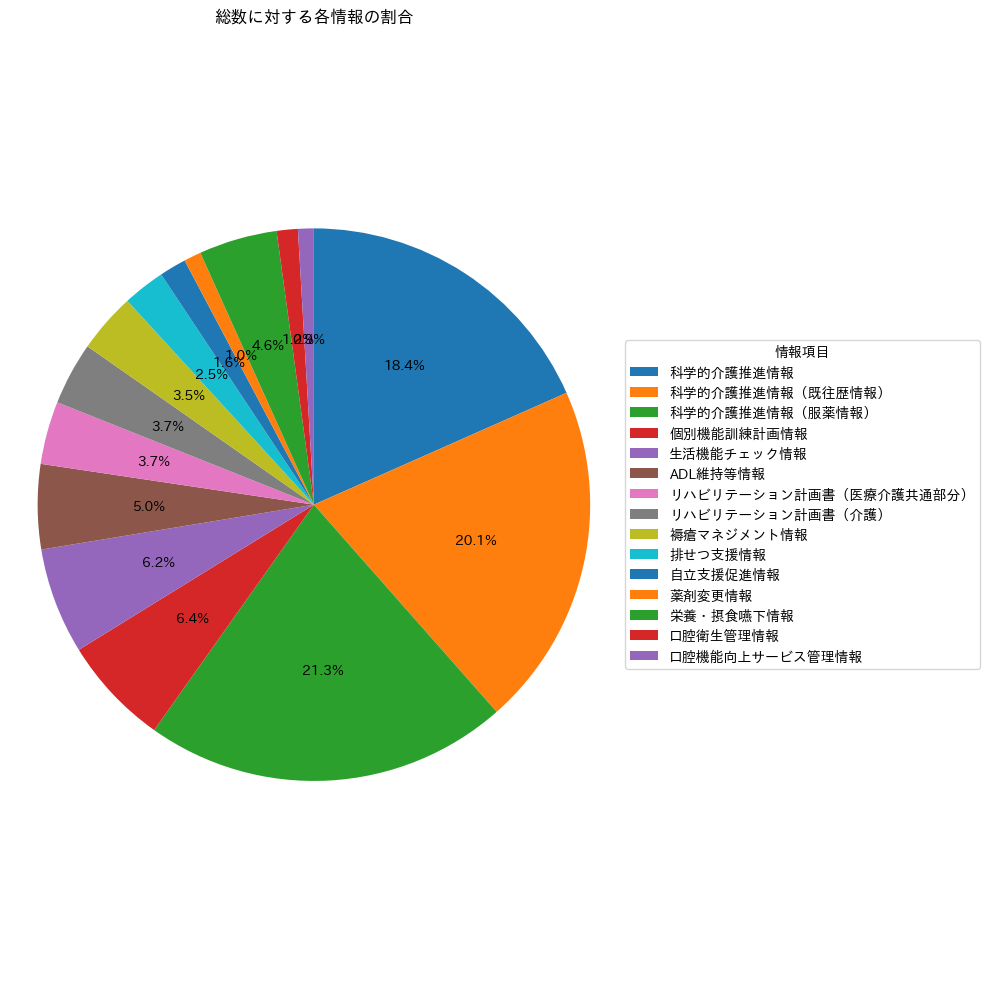

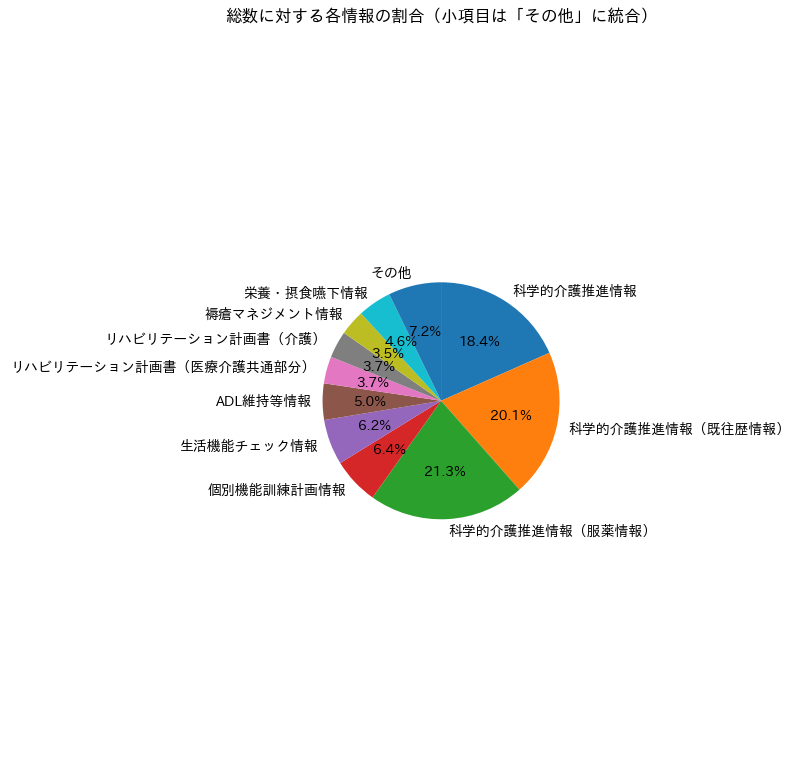

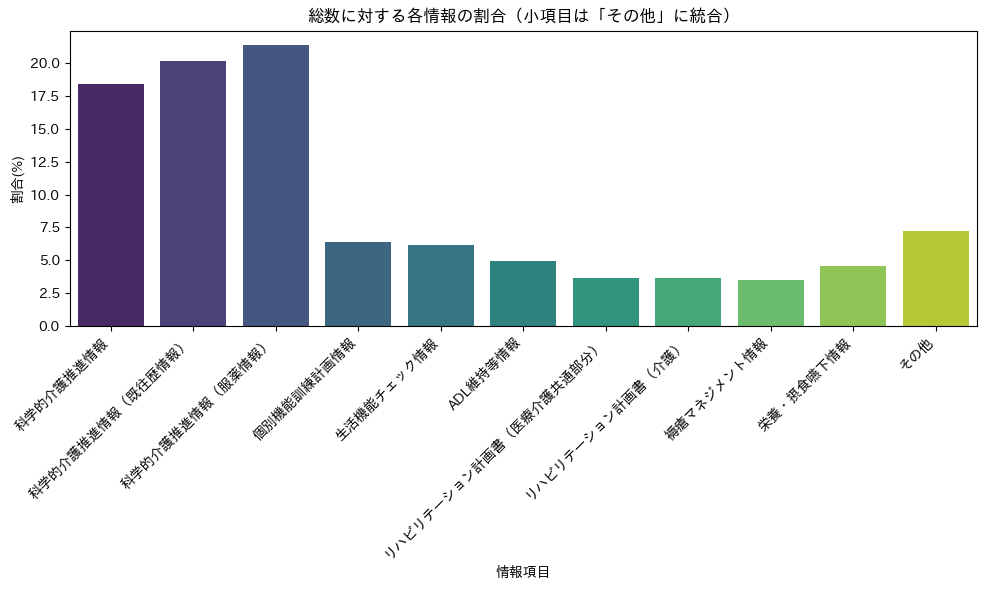

In [54]:
# 2. 割合の計算
total = df.at['総数', '総数']
# 総数列は割合に不要なので除外
cols = [c for c in df.columns if c != '総数']
counts = df.loc['総数', cols]
percent = counts / total * 100

# 割合をデータフレーム化（小数点第2位まで）
pct_df = percent.round(2).to_frame(name='割合(%)')
print(pct_df)

# 3. 円グラフの描画
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    percent,
    labels=None,               # ラベルを非表示
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.legend(
    wedges,
    percent.index,
    title="情報項目",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
plt.title('総数に対する各情報の割合')
plt.axis('equal')
plt.tight_layout()
plt.show()
# 未満の項目を "その他" にまとめる
threshold = 3
main = percent[percent >= threshold]
others = percent[percent < threshold]
main['その他'] = others.sum()

plt.figure(figsize=(8, 8))
plt.pie(
    main,
    labels=main.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title('総数に対する各情報の割合（小項目は「その他」に統合）')
plt.axis('equal')
plt.tight_layout()

# 4. 棒グラフの描画
plt.figure(figsize=(10, 6))
sns.barplot(
    x=main.index,
    y=main.values,
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('情報項目')
plt.ylabel('割合(%)')
plt.title('総数に対する各情報の割合（小項目は「その他」に統合）')
plt.tight_layout()
plt.show()